# LA Bike Sharing Network Analysis

## Data importing

In [1]:
##Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Importing data. Data is given by quarters.
q1_df = pd.read_csv('data/metro-trips-2020-q1.csv')
q2_df = pd.read_csv('data/metro-trips-2020-q2.csv')
q3_df = pd.read_csv('data/metro-trips-2020-q3.csv')
q4_df = pd.read_csv('data/metro-trips-2020-q4.csv')


In [3]:
# Consolidating the quarterly dataframes into one 
metro_df = q4_df.append(q3_df, ignore_index=True, sort=False)\
            .append(q2_df, ignore_index=True, sort=False)\
            .append(q1_df, ignore_index=True, sort=False)

In [4]:
# Glimpse of the data
metro_df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,148179433,14,10/1/2020 0:06,10/1/2020 0:20,3042,34.049301,-118.238808,3074,34.044170,-118.261169,6378,30,One Way,Monthly Pass,standard
1,148179933,18,10/1/2020 0:25,10/1/2020 0:43,4404,34.048130,-118.271027,4444,34.061619,-118.305573,12440,30,One Way,Monthly Pass,standard
2,148182639,141,10/1/2020 0:29,10/1/2020 2:50,4482,34.094372,-118.331009,4482,34.094372,-118.331009,19803,1,Round Trip,Walk-up,electric
3,148182739,141,10/1/2020 0:29,10/1/2020 2:50,4482,34.094372,-118.331009,4482,34.094372,-118.331009,18915,1,Round Trip,Walk-up,electric
4,148180233,15,10/1/2020 0:42,10/1/2020 0:57,3074,34.044170,-118.261169,3042,34.049301,-118.238808,20062,30,One Way,Monthly Pass,standard


In [5]:
# Lets look at the variables and datatypes of the dataset
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209974 entries, 0 to 209973
Data columns (total 15 columns):
trip_id                209974 non-null int64
duration               209974 non-null int64
start_time             209974 non-null object
end_time               209974 non-null object
start_station          209974 non-null int64
start_lat              165305 non-null float64
start_lon              165305 non-null float64
end_station            209974 non-null int64
end_lat                201033 non-null float64
end_lon                201033 non-null float64
bike_id                209974 non-null object
plan_duration          209974 non-null int64
trip_route_category    209974 non-null object
passholder_type        205248 non-null object
bike_type              209974 non-null object
dtypes: float64(4), int64(5), object(6)
memory usage: 24.0+ MB


In [6]:
# convert the start_time and end_time into date object
metro_df['start_time'] = pd.to_datetime(metro_df['start_time'])
metro_df['end_time'] = pd.to_datetime(metro_df['end_time'])


In [7]:
## Strucutre and descriptive statistics of the dataset
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209974 entries, 0 to 209973
Data columns (total 15 columns):
trip_id                209974 non-null int64
duration               209974 non-null int64
start_time             209974 non-null datetime64[ns]
end_time               209974 non-null datetime64[ns]
start_station          209974 non-null int64
start_lat              165305 non-null float64
start_lon              165305 non-null float64
end_station            209974 non-null int64
end_lat                201033 non-null float64
end_lon                201033 non-null float64
bike_id                209974 non-null object
plan_duration          209974 non-null int64
trip_route_category    209974 non-null object
passholder_type        205248 non-null object
bike_type              209974 non-null object
dtypes: datetime64[ns](2), float64(4), int64(5), object(4)
memory usage: 24.0+ MB


In [8]:
metro_df.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,2.099740e+05,209974.000000,209974.000000,165305.000000,165305.000000,209974.000000,201033.000000,201033.000000,209974.000000
mean,1.426180e+08,38.773396,3536.158472,34.052192,-118.257198,3670.051454,34.050258,-118.270163,56.332170
std,4.884567e+06,128.805149,661.597057,0.312124,2.236606,676.529117,0.248230,1.774130,105.574509
min,1.348675e+08,1.000000,3000.000000,33.928459,-118.491341,3000.000000,33.928459,-118.491341,1.000000
25%,1.381835e+08,7.000000,3006.000000,34.040600,-118.290092,3033.000000,34.039982,-118.291443,1.000000
50%,1.422025e+08,15.000000,3054.000000,34.048401,-118.260948,3076.000000,34.048038,-118.260948,30.000000
75%,1.466776e+08,27.000000,4335.000000,34.056610,-118.252441,4390.000000,34.056610,-118.252441,30.000000
max,1.517697e+08,1440.000000,4583.000000,55.705528,37.606541,4583.000000,55.705528,37.606541,999.000000


In [9]:
# Stations data is given in a different file. Lets import that here.
stations = pd.read_csv('data/metro-bike-share-stations-2021-01-01.csv')

In [10]:
# Glimpse of the data
stations.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,DTLA,Active
2,3006,Olive & 8th,7/7/2016,DTLA,Active
3,3007,5th & Grand,7/7/2016,DTLA,Active
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active


## Exploratory Data Analysis

### Correlation matrix

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#size of the plot
plt.figure(figsize = (10,10))
# Correlation matrix using seaborn
sns.heatmap(metro_df.corr(), annot=True)
plt.show()

<Figure size 1000x1000 with 2 Axes>

### Number of Trips by Membership Type

In [12]:
count_by_memtype = metro_df.groupby(['passholder_type'])['trip_id'].count().sort_values(ascending=False).head(20).reset_index(name='Count')


In [13]:
count_by_memtype

,passholder_type,Count
0,Monthly Pass,125788
1,Walk-up,40134
2,Annual Pass,20003
3,One Day Pass,19288
4,Testing,35


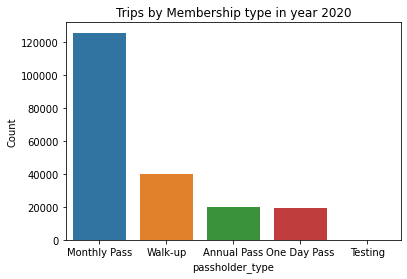

In [14]:
# plot the bar chart for trips by membership type
plt.Figure(figsize=(8,8))
plt.title("Trips by Membership type in year 2020")
sns.barplot('passholder_type', 'Count', data = count_by_memtype)
plt.show()

### Top 5 Stations with most outgoing bikes

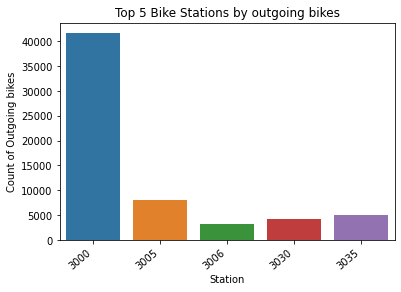

In [15]:
##Top 5 stations by number of bikes
top5 = pd.DataFrame()
top5['Station'] = metro_df['start_station'].value_counts().head().index
top5['Count of Outgoing bikes']=metro_df['start_station'].value_counts().head().values
top5['Station'] = top5['Station'].astype('category')

# plot the chart
sns.barplot('Station', 'Count of Outgoing bikes', data = top5)
plt.xticks(rotation=40, ha = 'right')
plt.title("Top 5 Bike Stations by outgoing bikes")
plt.show()

## Trend line -Trips throughout the year

In [16]:
#Create a date column to group the data by date
metro_df['date'] = metro_df['start_time'].dt.date

In [17]:
countbydates = metro_df.groupby(['date']).trip_id.count().reset_index(name='counts')
countbydates.head()

,date,counts
0,2020-01-01,572
1,2020-01-02,901
2,2020-01-03,972
3,2020-01-04,685
4,2020-01-05,632


C:\Users\siris\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Trips throughout the year - Trend line')

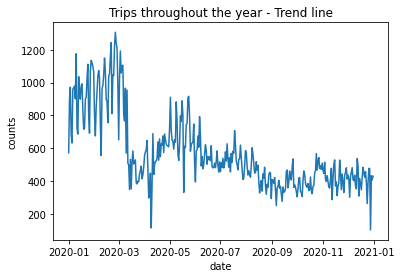

In [18]:
sns.lineplot(x="date", y="counts",
                data=countbydates)

plt.title("Trips throughout the year - Trend line")

## Predict Number of Outgoing bikes per station

In [19]:
outgoing_df = pd.DataFrame()
outgoing_df['Station'] = metro_df['start_station'].value_counts().head().index
outgoing_df['Number of Starts']=metro_df['start_station'].value_counts().head().values


In [20]:
outgoing_df.head()

,Station,Number of Starts
0,3000,41689
1,3005,8047
2,3035,5033
3,3030,4194
4,3006,3304


In [21]:
outgoing_df = pd.DataFrame()
outgoing_df = metro_df.groupby(['start_station', 'date'])['trip_id'].count().reset_index()
outgoing_df.rename(columns = {'trip_id': 'outgoingbikes'}, inplace = True)
outgoing_df.head()

,start_station,date,outgoingbikes
0,3000,2020-01-02,3
1,3000,2020-01-03,1
2,3000,2020-01-04,3
3,3000,2020-01-06,2
4,3000,2020-01-07,1


In [22]:
## Let's join Stations data with Outgoingbikes data. I'm using Outer join because I don't want to drop rows if there is no match
combined_df = pd.merge(stations,outgoing_df, left_on = 'Station_ID', right_on='start_station', how = 'outer' )
combined_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status,start_station,date,outgoingbikes
0,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-02,3.0
1,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-03,1.0
2,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-04,3.0
3,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-06,2.0
4,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-07,1.0


So, this dataframe has Stations data as well as number of outgoing bikes by date.

### Handling Missing Values

Let's check if the join is clean between Stations data and Outgoingbikes data

In [23]:
## Check for Nulls in Stations data fields
len(combined_df[combined_df.Station_ID.isnull()])

0

In [24]:
## Check for Nulls in Outgoingbikes data fields
len(combined_df[combined_df.start_station.isnull()])

62

So, there is no data found for some of the stations in Outgoingbikes data.

In [25]:
## Let's view the unmatched data
combined_df[combined_df.start_station.isnull()].head()

,Station_ID,Station_Name,Go_live_date,Region,Status,start_station,date,outgoingbikes
1775,3013,Anaheim & Avalon,7/31/2017,Port of LA,Inactive,NaN,NaN,NaN
3010,3021,3rd & Rose,7/7/2016,DTLA,Inactive,NaN,NaN,NaN
7179,3038,Main & 5th,7/7/2016,DTLA,Inactive,NaN,NaN,NaN
9544,3055,7th & Main,7/7/2016,DTLA,Inactive,NaN,NaN,NaN
10197,3059,11th & Santee,7/7/2016,DTLA,Inactive,NaN,NaN,NaN


In [26]:
# unique list of stations in Stations data
len(combined_df.start_station.unique())

267

In [27]:
# unique list of stations in Outgoingbikes data
len(combined_df.Station_ID.unique())

328

So, we don't have bike trips data for about 61 stations. I will drop these records from the dataset.

In [28]:
combined_df = combined_df.dropna(axis=0, subset=['start_station'])

In [29]:
## Let's view the null rows
combined_df[combined_df.start_station.isnull()].head()

,Station_ID,Station_Name,Go_live_date,Region,Status,start_station,date,outgoingbikes


we dropped the unmatching records. Let's check the count of the rows in the final dataset.

In [30]:
combined_df.shape

(39323, 8)

## Feature Engineering

I think day of the week and holidays would also impact the bike rentals. So, I would add date dimension to the combined_df.

In [31]:
## Date dimension is sourced from https://data.world/cegomez22/dimdate
date_df = pd.read_csv('data/date.csv')
date_df.head()

,sasdate,date_key,word_date,date,year,quarter,month,day_of_month,week,day_of_week,weekday,month_and_year,holiday,timezone_id,timezone,timezone_offset
0,21915,10120,1-Jan-20,1/1/2020,2020,1,1,1,0,Wed,4,Jan-60,NEWYEAR,ETC/GMT+7,GMT-07:00,-25200
1,21916,10220,2-Jan-20,1/2/2020,2020,1,1,2,0,Thu,5,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200
2,21917,10320,3-Jan-20,1/3/2020,2020,1,1,3,0,Fri,6,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200
3,21918,10420,4-Jan-20,1/4/2020,2020,1,1,4,0,Sat,7,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200
4,21919,10520,5-Jan-20,1/5/2020,2020,1,1,5,1,Sun,1,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200


In [32]:
date_df['date1'] = pd.to_datetime(date_df['date'], format='%m/%d/%Y')

In [33]:
date_df.head()

,sasdate,date_key,word_date,date,year,quarter,month,day_of_month,week,day_of_week,weekday,month_and_year,holiday,timezone_id,timezone,timezone_offset,date1
0,21915,10120,1-Jan-20,1/1/2020,2020,1,1,1,0,Wed,4,Jan-60,NEWYEAR,ETC/GMT+7,GMT-07:00,-25200,2020-01-01
1,21916,10220,2-Jan-20,1/2/2020,2020,1,1,2,0,Thu,5,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-02
2,21917,10320,3-Jan-20,1/3/2020,2020,1,1,3,0,Fri,6,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-03
3,21918,10420,4-Jan-20,1/4/2020,2020,1,1,4,0,Sat,7,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-04
4,21919,10520,5-Jan-20,1/5/2020,2020,1,1,5,1,Sun,1,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-05


In [34]:
combined_df['outgoingbike_dt'] = pd.to_datetime(combined_df['date'], format='%Y-%m-%d')
combined_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status,start_station,date,outgoingbikes,outgoingbike_dt
0,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-02,3.0,2020-01-02
1,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-03,1.0,2020-01-03
2,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-04,3.0,2020-01-04
3,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-06,2.0,2020-01-06
4,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-07,1.0,2020-01-07


In [35]:
final_df = pd.merge(combined_df,date_df, left_on = ['outgoingbike_dt'], right_on = ['date1'] , how = 'outer')

In [36]:
final_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status,start_station,date_x,outgoingbikes,outgoingbike_dt,sasdate,...,day_of_month,week,day_of_week,weekday,month_and_year,holiday,timezone_id,timezone,timezone_offset,date1
0,3000,Virtual Station,7/7/2016,NaN,Active,3000.0,2020-01-02,3.0,2020-01-02,21916,...,2,0,Thu,5,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-02
1,3005,7th & Flower,7/7/2016,DTLA,Active,3005.0,2020-01-02,49.0,2020-01-02,21916,...,2,0,Thu,5,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-02
2,3006,Olive & 8th,7/7/2016,DTLA,Active,3006.0,2020-01-02,6.0,2020-01-02,21916,...,2,0,Thu,5,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-02
3,3007,5th & Grand,7/7/2016,DTLA,Active,3007.0,2020-01-02,16.0,2020-01-02,21916,...,2,0,Thu,5,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-02
4,3008,Figueroa & 9th,7/7/2016,DTLA,Active,3008.0,2020-01-02,11.0,2020-01-02,21916,...,2,0,Thu,5,Jan-60,NaN,ETC/GMT+7,GMT-07:00,-25200,2020-01-02


In [37]:
final_df.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region ', 'Status',
       'start_station', 'date_x', 'outgoingbikes', 'outgoingbike_dt',
       'sasdate', 'date_key', 'word_date', 'date_y', 'year', 'quarter',
       'month', 'day_of_month', 'week', 'day_of_week', 'weekday',
       'month_and_year', 'holiday', 'timezone_id', 'timezone',
       'timezone_offset', 'date1'],
      dtype='object')

In [38]:
final_df = final_df.drop(['Station_Name','start_station','Go_live_date','Region ', 'date_x', 'sasdate','date_key','word_date','date_y',\
                          'month_and_year','timezone_id','timezone','timezone_offset','date1','outgoingbike_dt'                         
                         ] , axis = 1 )
final_df.head()

,Station_ID,Status,outgoingbikes,year,quarter,month,day_of_month,week,day_of_week,weekday,holiday
0,3000,Active,3.0,2020,1,1,2,0,Thu,5,NaN
1,3005,Active,49.0,2020,1,1,2,0,Thu,5,NaN
2,3006,Active,6.0,2020,1,1,2,0,Thu,5,NaN
3,3007,Active,16.0,2020,1,1,2,0,Thu,5,NaN
4,3008,Active,11.0,2020,1,1,2,0,Thu,5,NaN


In [39]:
final_df[['holiday']]=final_df[['holiday']].where(final_df[['holiday']].isnull(), 1).fillna(0).astype(int)
final_df.head()

,Station_ID,Status,outgoingbikes,year,quarter,month,day_of_month,week,day_of_week,weekday,holiday
0,3000,Active,3.0,2020,1,1,2,0,Thu,5,0
1,3005,Active,49.0,2020,1,1,2,0,Thu,5,0
2,3006,Active,6.0,2020,1,1,2,0,Thu,5,0
3,3007,Active,16.0,2020,1,1,2,0,Thu,5,0
4,3008,Active,11.0,2020,1,1,2,0,Thu,5,0


In [40]:
# Create dummy variables for categorical variables - Station_Id, day of week and status
processed_df = pd.DataFrame()
processed_df = pd.get_dummies(final_df)
processed_df.head()

,Station_ID,outgoingbikes,year,quarter,month,day_of_month,week,weekday,holiday,Status_Active,Status_Inactive,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
0,3000,3.0,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
1,3005,49.0,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
2,3006,6.0,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
3,3007,16.0,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
4,3008,11.0,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0


In [42]:
#processed_df['outgoingbike_dt']=processed_df['outgoingbike_dt'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [43]:
processed_df.shape

(39323, 18)

In [44]:
# Defining independant variables
features_df = processed_df.iloc[ : ,2:200]
features_df.head()

,year,quarter,month,day_of_month,week,weekday,holiday,Status_Active,Status_Inactive,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
0,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
1,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
2,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
3,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0
4,2020,1,1,2,0,5,0,1,0,0,0,0,0,1,0,0


In [45]:
target_df = processed_df['outgoingbikes']

In [46]:
# ensuring lenghts of the features and targets
print(len(features_df))
print(len(target_df))

39323
39323


### Splitting the dataset into Train and Test datasets

In [47]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df,
                                target_df,
                                test_size=0.30,
                                random_state=42)

In [48]:
X_train.head()

,year,quarter,month,day_of_month,week,weekday,holiday,Status_Active,Status_Inactive,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
26072,2020,3,8,22,33,7,0,1,0,0,0,1,0,0,0,0
25331,2020,3,8,15,32,7,0,1,0,0,0,1,0,0,0,0
16552,2020,1,2,23,8,1,0,0,1,0,0,0,1,0,0,0
3256,2020,1,1,28,4,3,0,1,0,0,0,0,0,0,1,0
37097,2020,4,12,10,49,5,0,1,0,0,0,0,0,1,0,0


In [50]:
y_train.head()

26072     3.0
25331     4.0
16552    13.0
3256     29.0
37097     1.0
Name: outgoingbikes, dtype: float64

#### Rescaling the data

In [60]:
# SKLearn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## Modeling and Evaluation

### Decision Tree

In [71]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(rescaledX_train, y_train)

# Predicting results for training data set
y_pred_train = regressor.predict(rescaledX_train)

# Predicting results for test data
y_pred_test = regressor.predict(rescaledX_test)

# Residuals
residuals_in_train = y_train - y_pred_train
residuals_in_test = y_test - y_pred_test

In [76]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Train data - mean Absolute Error ", mean_absolute_error(y_train, y_pred_train))

#Mean Squared Error
print("Train data - mean Squared Error ", mean_squared_error(y_train, y_pred_train))

#R² Score
print("Train data - R-square ", r2_score(y_train, y_pred_train))

Train data - mean Absolute Error  3.0261562004690057
Train data - mean Squared Error  32.24290333268285
Train data - R-square  0.9550363529624736


In [75]:
#Mean Absolute Error
print("Test data - mean Absolute Error is : ", mean_absolute_error(y_test, y_pred_test))

#Mean Squared Error
print("Test data - mean Squared Error : ", mean_squared_error(y_test, y_pred_test))

#R² Score
print("Test data - R-square  : ", r2_score(y_test, y_pred_test))

Test data - mean Absolute Error is :  3.2338108884582883
Test data - mean Squared Error :  56.18998314694801
Test data - R-square  :  0.9177299501302141


#### Plot for Fitted values Vs Residuals

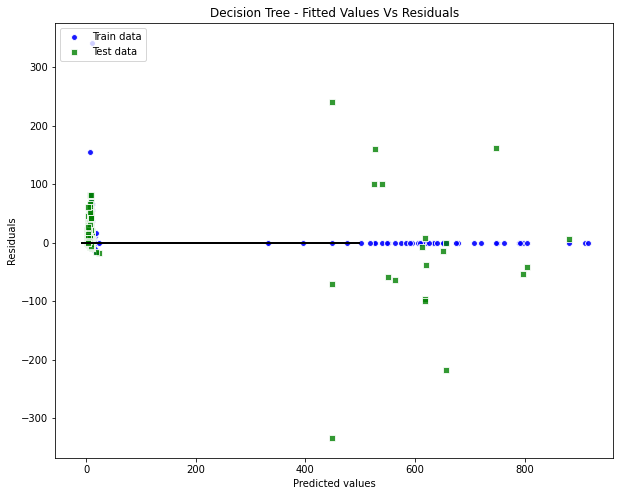

In [80]:
# plotting residuals to see the error pattern

plt.figure(figsize = (10,10))

plt.scatter(y_pred_train,residuals_dt_train,
               c='blue',
                edgecolor='white',
                marker='o',
                s=35,
                alpha=0.9,
                label='Train data')


plt.scatter(y_pred_test,residuals_dt_test,
                c='green',
                edgecolor='white',
                marker='s',
                s=35,
                alpha=0.8,
                label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title("Decision Tree - Fitted Values Vs Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=500, lw=2, color='black')
plt.show()

### Random forest

In [81]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=1000,
                                    criterion='mse',
                                    random_state=1,
                                    n_jobs=-1)

rf_regressor.fit(X_train, y_train)

# Predicting a new result for test data 
y_pred_train_rf = rf_regressor.predict(X_train)


# Predicting a new result for test data 
y_pred_test_rf = rf_regressor.predict(X_test)


In [83]:
#Mean Absolute Error
print("Train data - Mean Absolute Error is : ", mean_absolute_error(y_train, y_pred_train_rf))
#Mean Squared Error
print("Train data - Mean Squared Error : ", mean_squared_error(y_train, y_pred_train_rf))
#R²
print("Train data - R-square : ", r2_score(y_train, y_pred_train_rf))

Train data - Mean Absolute Error is :  3.089359274159684
Train data - Mean Squared Error :  36.800492735513664
Train data - R-square :  0.9486806647312859


In [84]:
print("Test data - Mean Absolute Error is : ", mean_absolute_error(y_test, y_pred_test_rf))
print("Test data - Mean Squared Error : ", mean_squared_error(y_test, y_pred_test_rf))
print("Test data - R-square: ", r2_score(y_test, y_pred_test_rf))

Test data - Mean Absolute Error is :  3.2042890728644355
Test data - Mean Squared Error :  51.82978420403847
Test data - R-square:  0.924113895530896
